In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import mpld3
import numpy as np
import itertools
from tabulate import tabulate

# need code in the ../python directory, specifically svg_extract_data
import sys
import os
sys.path.append('../python/')
from svgpathtools import *
from svg_extract_data import *

#%matplotlib notebook
#%matplotlib inline
mpld3.enable_notebook()

In [2]:
# svg2paths does not apply relevant transformation to paths!
#paths, attributes = svg2paths('edelweiss_ER_band_GGA3.svg')

# Document does apply relevant transformations, it's what you need
"""
doc = Document('edelweiss_ER_band_GGA3.svg')
doc = doc.flatten_all_paths()
print (doc[0].path[0].start.real)
print(len(doc[0].path))
print (doc[0].path[0].length())
"""

"\ndoc = Document('edelweiss_ER_band_GGA3.svg')\ndoc = doc.flatten_all_paths()\nprint (doc[0].path[0].start.real)\nprint(len(doc[0].path))\nprint (doc[0].path[0].length())\n"

In [4]:
# for bands, GGA1
# paths with 4 lines seem to be data points (doesn't graph so well, there are lots!)
# path with 7 lines is some kind of curve
# path with 13 lines also curve
# path with 17 lines left y-axis with minor, major ticks
# path with 19 lines a curve
# path with 21 a curve
# path with 22 bottom x-axis with minor, major ticks
# paths with 23 lines are both curves
# path with 40 lines is top/right axes with minor, major ticks and line at Y=1
# path with 46 lines seems to be the ER band, both top and bottom
def get_paths(doc, path_len):
    #import matplotlib.pyplot as plt
    #import numpy as np
    path_arr = []
    
    #print ([len(result.path) for result in doc])
    
    for result in doc:
        path = result.path

        if len(path) == path_len: # maybe these are error bars?
            path_arr.append(path)
            #print (path)
            #for line in path:
                # if the line is NOT a Bezier curve
                #if not hasattr(line, 'control1'):
                    #print ("plotting, ", len(path))

    return path_arr

def plot_paths(paths):
    for path in paths:
        for line in path:
            #print(path)
            plt.plot([line.start.real,line.end.real],[line.start.imag,line.end.imag],'.-')
            
    #plt.ylim(0,200)
    #plt.xlim(0,200)


In [7]:
# load svg data only if we haven't already got it
try:
    doc
except NameError:
    doc = Document('../analysis_documentation/pics/lindhard2_curves.svg')
    doc = doc.flatten_all_paths()

    #print(len(paths)) #2 paths with 13 lines in edelweiss_ER_band_GGA3.svg
    #paths_ER = get_paths(doc, 13)
    #plot_paths(paths_ER)

    paths_NR = get_paths(doc, 4)
    print(len(paths_NR))
    #plot_paths(paths_NR)
    #plot_paths((paths_NR[0],))
    #print(paths_NR[0])

    #plt.show()

NameError: name 'Document' is not defined

In [5]:
# these are the points for the GGA1 graph
graph_points_GGA1 = np.array([(0,0), (50,0), (100,0), (150,0), (200,0), (0,0.5), (0,1), (0,1.5)])

# get_calib_fn (doc, graph_points):
xcalib_fn, ycalib_fn = get_calib_fn(doc, graph_points_GGA1)

29.95067000000003 256.79693 2.1674000000000433 239.68490000000006
[Line(start=(29.950680000000006+3.3261400000000094j), end=(255.37818000000001+3.3261400000000094j)), Line(start=(255.37818000000001+238.02989000000002j), end=(29.950680000000006+238.02989000000002j)), Line(start=(29.950680000000006+3.3261400000000663j), end=(255.37818000000001+3.3261400000000663j)), Line(start=(31.110679999999974+81.50614000000004j), end=(254.21942999999996+81.50614000000004j)), Line(start=(29.95067000000003+238.02989000000002j), end=(255.37817000000004+238.02989000000002j))] [Line(start=(255.37818000000001+3.3261400000000094j), end=(255.37818000000001+238.02989000000002j)), Line(start=(29.950680000000006+238.02989000000002j), end=(29.950680000000006+3.3261400000000094j)), Line(start=(255.37818000000001+238.02989000000002j), end=(255.37818000000001+3.3261400000000094j)), Line(start=(29.95067000000003+238.02989000000002j), end=(29.95067000000003+3.3261400000000094j))]
[5.6299999999999955, 11.2637499999999

In [6]:
#paths_GGA1 = list(itertools.chain(*paths_GGA1))
print(paths_NR[0:3])
paths_NR[2].isclosed()
#plot_paths(paths_NR[0:3])

for path in paths_NR[0:3]:
    # only Bezier curves are data points AFAIK
    isData = any([hasattr(line, 'control1') for line in path])
    
    if isData:
        plot_paths((path,))

[Path(Line(start=(29.950680000000006+3.3261400000000094j), end=(255.37818000000001+3.3261400000000094j)),
     Line(start=(255.37818000000001+3.3261400000000094j), end=(255.37818000000001+238.02989000000002j)),
     Line(start=(255.37818000000001+238.02989000000002j), end=(29.950680000000006+238.02989000000002j)),
     Line(start=(29.950680000000006+238.02989000000002j), end=(29.950680000000006+3.3261400000000094j))), Path(CubicBezier(start=(148.14943000000002+57.992399999999975j), control1=(148.14943000000002+57.58114999999997j), control2=(147.81568000000001+57.24864999999998j), end=(147.40693000000002+57.24864999999998j)),
     CubicBezier(start=(147.40693000000002+57.24864999999998j), control1=(146.99443000000002+57.24864999999998j), control2=(146.65943000000001+57.58114999999997j), end=(146.65943000000001+57.992399999999975j)),
     CubicBezier(start=(146.65943000000001+57.992399999999975j), control1=(146.65943000000001+58.40489999999998j), control2=(146.99443000000002+58.738649999

In [7]:
def get_data_from_path(path, xcalib_fn, ycalib_fn):
    """get_data_from_path assumes your point is made of four lines with
    a start and an end and that the average of the vertical and horizontal lines
    gives the center of the point"""
    t1 = 0.25
    t2 = 0.45
    mag = path.length()
    
    try:
        n1 = path.normal(t1)
        n2 = path.normal(t2)

        line1 = Line(path.point(t1) - mag*n1, path.point(t1) + mag*n1)
        line2 = Line(path.point(t2) - mag*n2, path.point(t2) + mag*n2)

        # t is the parameter for intersection for line1,
        # k is the parameter for intersection for line2
        [(t, k)] = line1.intersect(line2)
        #print(line1.point(t_int), line2.point(k_int))
        #print(t_int)
        #print(line1)
        #plot_paths((path, [line1], [line2]))

        point = (xcalib_fn(line1.point(t).real), ycalib_fn(line1.point(t).imag))
    except:       
        point = (np.NaN, np.NaN)
              
    return point 
    


point_table = []
for path in paths_NR:
    # only Bezier curves are data points AFAIK
    #isData = any([hasattr(line, 'control1') for line in path])
    
    # only Bezier curves are data points AFAIK
    isData = any([hasattr(line, 'control1') for line in path])
    
    if isData:    
        point = get_data_from_path(path, xcalib_fn, ycalib_fn)
        point_table.append(point)

        # store in point_table for use later
        #point_table.append(path0_arr[:,0])
        #point_table.append(path0_arr[:,1])
    
#print(point_table)

headers=["'Erecoil (keV)'", "'Yield'"]
#print (tabulate(point_table, headers=headers, tablefmt="plain", numalign="left"))

#with open("edelweiss_GGA1_pointData.txt", "w") as text_file:
#    print(tabulate(point_table, headers=headers, tablefmt="plain", numalign="left"), file=text_file)

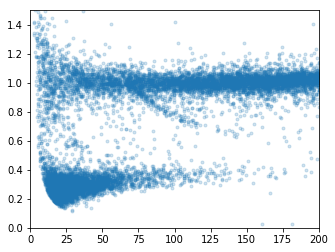

In [9]:

plt.plot(np.array(point_table)[:,0], np.array(point_table)[:,1], '.', alpha=0.2)
#plt.plot(path1_arr[:,0], path1_arr[:,1],'r--')
#minorLocatorX = MultipleLocator(10)
#minorLocatorY = MultipleLocator(0.1)
ax = plt.gca()
#ax.xaxis.set_minor_locator(minorLocatorX)
#ax.yaxis.set_minor_locator(minorLocatorY)
#plt.ylim(min(graph_points_GGA1[:,1]),max(graph_points_GGA1[:,1]))
#plt.yticks(list(set(graph_points_GGA1[:,1])))
#plt.tick_params(which="major", right=True, top=True, direction="in", length=12)
#plt.tick_params(which="minor", right=True, top=True, direction="in", length=10)
# see https://jdhao.github.io/2017/06/03/change-aspect-ratio-in-mpl/
ax.set_aspect(0.75*1.0/ax.get_data_ratio())
plt.xlim(0,200)
plt.ylim(0,1.5)
#plt.xticks(list(set(graph_points_GGA1[:,0])))
plt.show()